<a href="https://colab.research.google.com/github/oktsadwikar/DPDM2023/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From data iris, separate the data iris to test and train, and make the code for KNN using train data

In [62]:
import numpy as np

In [63]:
from sklearn import datasets
iris = datasets.load_iris()

In [64]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [65]:
test_data_0 = iris['data'][:5,:]
test_data_1 = iris['data'][50:55,:]
test_data_2 = iris['data'][100:105,:]

train_data_0 = iris['data'][5:50,:]
train_data_1 = iris['data'][55:100,:]
train_data_2 = iris['data'][105:,:]

In [66]:
test_data_0

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [67]:
test_data_1

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

In [68]:
test_data_2

array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2]])

In [69]:
test_data = np.concatenate([test_data_0,test_data_1,test_data_2])
train_data = np.concatenate([train_data_0,train_data_1,train_data_2])

In [70]:
test_label_0 = iris['target'][:5]
test_label_1 = iris['target'][50:55]
test_label_2 = iris['target'][100:105]

train_label_0 = iris['target'][5:50]
train_label_1 = iris['target'][55:100]
train_label_2 = iris['target'][105:]

**HOMEWORK 4**

write your own KNN algorithm using sorting function from HW 2, The function should take 3 parameters:

- training data
- test data
- K

**Answer**

1. Create Function to calculate Euclidean Distance

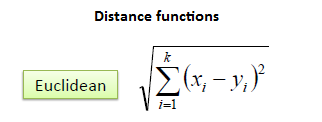

In [71]:
def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two data points
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return distance ** 0.5

Try with train point and test point

In [72]:
test_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [73]:
train_data[0]

array([5.4, 3.9, 1.7, 0.4])

In [74]:
ED = euclidean_distance(test_data[0],train_data[0])
ED

0.6164414002968979

2. Create KNN Function

In [75]:
def knn(training_data, test_data, k):
    predictions = []

    # Outer looping: calculate each test point [i]
    for test_point in test_data:
        # Calculate distances between test_point and all training data points
        distances = []
        for train_point in training_data:
            # Using euclidean_distance function
            distance = euclidean_distance(test_point, train_point[:-1])
            distances.append((train_point, distance))

        # Sort distances using Bubble Sort
        for i in range(len(distances) - 1):
            for j in range(len(distances) - 1 - i):
                if distances[j][1] > distances[j + 1][1]:
                    distances[j], distances[j + 1] = distances[j + 1], distances[j]

        # Get the K nearest neighbors
        k_neighbors = distances[:k]

        # Count the class occurrences in the KNN
        class_count = {}
        for neighbor in k_neighbors:
            label = neighbor[0][-1]
            if label in class_count:
                class_count[label] += 1
            else:
                class_count[label] = 1

        # Predict the class label with the highest count
        prediction = max(class_count, key=class_count.get)
        predictions.append(prediction)

    return predictions

Try the function with iris dataset

In [76]:
test_data = np.concatenate([test_data_0,test_data_1,test_data_2])
train_data = np.concatenate([train_data_0,train_data_1,train_data_2])

In [77]:
test_label = np.concatenate([test_label_0,test_label_1,test_label_2])
train_label = np.concatenate([train_label_0,train_label_1,train_label_2])

In [78]:
train_dataset = np.c_[train_data, train_label]

In [79]:
train_dataset[:5]

array([[5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

In [80]:
test_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [81]:
len(test_data)

15

Predict with k = 3

In [82]:
knn(train_dataset,test_data,3)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [83]:
knn(train_dataset[:10],test_data,3)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [84]:
knn(train_dataset,test_data,5)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]

Try with other data

In [85]:
X = [[1,2,'A'], [3,4,'B'], [5,6,'A'], [7,8,'B']]
Y = [[2.5,3.5],[1.5,2.5]]

In [86]:
knn(X,Y,3)

['A', 'A']